## **1. Install BigDL Chronos**

In [1]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-chronos[all]
!pip uninstall -y torchtext
exit() # restart the runtime to refresh installed pkg

     |████████████████████████████████| 222 kB 5.0 MB/s 
     |████████████████████████████████| 2.2 MB 59.2 MB/s 
     |████████████████████████████████| 23.6 MB 1.2 MB/s 
     |████████████████████████████████| 71.0 MB 342 bytes/s 
     |████████████████████████████████| 100.7 MB 50 kB/s 
     |████████████████████████████████| 35.4 MB 460 kB/s 
     |████████████████████████████████| 218.4 MB 46 kB/s 
     |████████████████████████████████| 65 kB 3.0 MB/s 
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 57.6 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 38.5 MB/s 
     |████████████████████████████████| 271 kB 57.3 MB/s 
     |████████████████████████████████| 197 kB 66.6 MB/s 
     |████████████████████████████████| 173 kB 44.9 MB/s 
     |████████████████████████████████| 202 kB 69.3 MB/s 
     |████████████

## **2. Import data**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [43]:
f = open('/content/drive/MyDrive/Courses/DS104_Distributed-And-Parallel-Computing/Đồ-án-DS104/dataset/stock_prices.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
with open('data.json', 'w') as f:
    json.dump(data['data'], f)

In [44]:
df = pd.read_json('data.json')
df

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2022-01-20,15:01:03,HOSE,STOCK,86.8,92.8,80.8,85.2,87.5,83.1,87.1,85.660,85.200,87.500,83.100,87.100,85.660,2794300,239372970000,0,0,0.3,0.3000,0.3456
1,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,85.0,86.8,86.330,87.500,87.500,85.000,86.800,86.330,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132
2,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,84.0,87.6,86.350,85.500,87.600,84.000,87.600,86.350,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
3,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,82.3,86.2,85.640,83.000,88.000,82.300,86.200,85.640,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
4,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,81.0,83.4,82.770,81.900,83.400,81.000,83.400,82.770,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,30.1,31.5,30.809,12.872,13.251,12.663,13.251,12.959,1035220,31894000000,0,0,1.5,0.6310,5.0000
2255,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,28.0,30.0,29.373,11.779,12.620,11.779,12.620,12.357,1312740,38559000000,0,0,0.8,0.3365,2.7397
2256,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,27.8,29.2,28.821,11.779,12.410,11.695,12.283,12.124,501540,14455000000,0,0,0.7,0.2945,2.4561
2257,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,27.0,28.5,28.050,11.737,11.989,11.358,11.989,11.801,500650,14043000000,0,0,0.7,0.2945,2.5180


In [45]:
df = df.sort_values(by="date", ignore_index=True)
df

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2013-01-02,14:01:04,HOSE,STOCK,27.2,28.5,25.9,27.2,27.8,27.2,27.8,27.576,11.443,11.695,11.443,11.695,11.600,168190,4638000000,0,0,0.6,0.2524,2.2059
1,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,27.0,28.5,28.050,11.737,11.989,11.358,11.989,11.801,500650,14043000000,0,0,0.7,0.2945,2.5180
2,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,27.8,29.2,28.821,11.779,12.410,11.695,12.283,12.124,501540,14455000000,0,0,0.7,0.2945,2.4561
3,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,28.0,30.0,29.373,11.779,12.620,11.779,12.620,12.357,1312740,38559000000,0,0,0.8,0.3365,2.7397
4,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,30.1,31.5,30.809,12.872,13.251,12.663,13.251,12.959,1035220,31894000000,0,0,1.5,0.6310,5.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,81.0,83.4,82.770,81.900,83.400,81.000,83.400,82.770,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
2255,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,82.3,86.2,85.640,83.000,88.000,82.300,86.200,85.640,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
2256,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,84.0,87.6,86.350,85.500,87.600,84.000,87.600,86.350,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
2257,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,85.0,86.8,86.330,87.500,87.500,85.000,86.800,86.330,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132


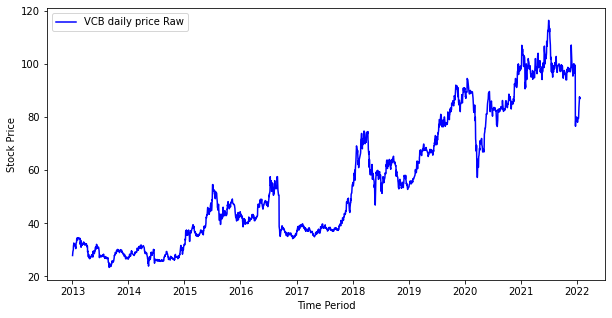

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(df.date, df.close, color='blue', label='VCB daily price Raw')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## **3. Init Orca Context** 

In [47]:
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details. Note that argument ```init_ray_on_spark``` must be ```True``` for Chronos.

In [8]:
# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True) # run in local mode

#init_orca_context(cluster_mode="k8s", master="k8s://https://<k8s-apiserver-host>:<k8s-apiserver-port>", container_image="intelanalytics/bigdl-k8s:latest", num_nodes=2, cores=2, init_ray_on_spark=True, conda_name='Anaconda3-5.1.0-Linux-x86_64') # run on K8s cluster

#init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2, init_ray_on_spark=True) # run on Hadoop YARN cluster

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-01-31 15:02:55 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-01-31 15:02:58,580 Thread-17 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-31 15:02:58,584 Thread-17 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-31 15:02:58,586 Thread-17 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-31 15:02:58,588 Thread-17 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-01-31 15:02:58 [Thread-17] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-01-31 15:02:58 [Thread-17] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

22-01-31 15:02:59 [Thread-17] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 52
2022-01-31 15:02:59 WARN  SparkContext:66 - Using an existing SparkContext; some configuration may not take effect.
22-01-31 15:02:59 [Thread-17] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity
Successfully got a SparkContext


2022-01-31 15:03:04,562	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-01-31_15-03-00_874474_322/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-01-31_15-03-00_874474_322/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-01-31_15-03-00_874474_322', 'metrics_export_port': 62817, 'node_id': 'fa4a73e01e28dc5358d7c53b761d6529be84a0e398bfd4644f222604'}


<SparkContext master=local[4] appName=pyspark-shell>

## **4. Create an AutoTSEstimator-LSTM**


### **4.0. Data transformation and feature engineering using Chronos TSDataset**
[TSDataset](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/tsdataset.html) is our abstract of time series dataset for data transformation and feature engineering. Here we use it to preprocess the data.

In [49]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, # the dataframe to load
                                                              dt_col="date",  # the column name specifying datetime
                                                              target_col="close", # the column name to predict
                                                              with_split=True, # split the dataset into 3 parts
                                                              val_ratio=0.1, # validation set ratio
                                                              test_ratio=0.1) # test set ratio

# for each tsdataset, we 
# 1. generate datetime feature columns.
# 2. impute the dataset with last occured value.
# 3. scale the dataset with standard scaler, fit = true for train data.
#standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    # tsdata.gen_dt_feature()\
    #       .impute(mode="last")\
    #       .scale(standard_scaler, fit=(tsdata is tsdata_train))
    tsdata.impute(mode="last")\
          .scale(minmax_scaler, fit=(tsdata is tsdata_train))

    #tsdata.scale(standard_scaler, fit=(tsdata is tsdata_train))

[AutoTSEstimator](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html) is our Automated TimeSeries Estimator for time series forecasting task.

In [50]:
import bigdl.orca.automl.hp as hp
from bigdl.chronos.autots import AutoTSEstimator
auto_estimator = AutoTSEstimator(model='lstm', # the model name used for training
                                 search_space='normal', # a default hyper parameter search space
                                 past_seq_len=50, future_seq_len=1, # hp sampling function of past_seq_len for auto-tuning
                                 selected_features='auto') 

### **4.1. Fit with AutoTSEstimator**

In [51]:
# fit with AutoTSEstimator for a returned TSPipeline
ts_pipeline = auto_estimator.fit(data=tsdata_train, # train dataset
                                 validation_data=tsdata_val, # validation dataset
                                 batch_size=hp.choice([16]),
                                 epochs=50) # number of epochs to train in each trial

Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr
train_func_b4357_00000,PENDING,,16,0.146064,16,1,0.00558161
train_func_b4357_00001,PENDING,,16,0.0793323,32,1,0.00565889
train_func_b4357_00002,PENDING,,16,0.189042,64,1,0.00311721
train_func_b4357_00003,PENDING,,16,0.0884679,16,2,0.00361401
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139


(ImplicitFunc pid=3947) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=3947)   import pandas.util.testing as tm
(ImplicitFunc pid=3948) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=3948)   import pandas.util.testing as tm
(ImplicitFunc pid=3947) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.146064199236378 and num_layers=1
(ImplicitFunc pid=3947)   "num_layers={}".format(dropout, num_layers))
(ImplicitFunc pid=3948) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout optio

Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139


(ImplicitFunc pid=4008) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=4008)   import pandas.util.testing as tm
(ImplicitFunc pid=3977) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08846793249963836 and num_layers=1
(ImplicitFunc pid=3977)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139


(ImplicitFunc pid=4008) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.07933231787070799 and num_layers=1
(ImplicitFunc pid=4008)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,1,6.35432,0.0064349,0.0064349
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,,,,
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,1,8.13523,0.00483038,0.00483038
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,,,,
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,2,11.7395,0.00302457,0.00302457
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,1,7.29681,0.000917041,0.000917041
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,1,8.13523,0.00483038,0.00483038
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,1,11.7839,0.00524613,0.00524613
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,3,16.8069,0.00302457,0.00404851
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,2,12.9243,0.000917041,0.00139617
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,2,15.3747,0.00118416,0.00118416
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,1,11.7839,0.00524613,0.00524613
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,4,22.0082,0.000815869,0.000815869
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,3,18.5244,0.000899321,0.000899321
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,3,21.9978,0.00118416,0.00381634
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,2,21.608,0.0052449,0.0052449
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,5,27.0728,0.000815869,0.00367748
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,4,24.0994,0.000857146,0.000857146
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,4,28.6929,0.00118416,0.00172717
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,2,21.608,0.0052449,0.0052449
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,6,32.7704,0.000815869,0.000969891
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,5,30.751,0.000728481,0.000728481
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,5,36.2291,0.000906131,0.000906131
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,3,32.4727,0.00138715,0.00138715
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,8,42.395,0.000805387,0.000805387
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,6,36.413,0.000713915,0.000713915
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,5,36.2291,0.000906131,0.000906131
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,3,32.4727,0.00138715,0.00138715
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,9,47.2312,0.00071776,0.00071776
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,7,42.1892,0.00071039,0.00071039
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,6,42.8008,0.000906131,0.00100758
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,4,42.0698,0.00138715,0.00185233
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,10,52.2909,0.00071776,0.000724737
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,8,47.8599,0.000663786,0.000663786
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,7,49.4018,0.000886875,0.000886875
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,4,42.0698,0.00138715,0.00185233
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,11,57.3878,0.00071776,0.00072147
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,9,53.5208,0.000663786,0.000686145
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,8,56.2395,0.000886875,0.00121053
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,5,51.8894,0.00138715,0.0127819
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,12,62.5334,0.000700157,0.000700157
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,10,59.3284,0.000633743,0.000633743
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,9,62.7403,0.000886875,0.00115784
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,6,61.2723,0.00124247,0.00124247
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,13,67.6687,0.000700157,0.00113627
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,11,65.0633,0.000616096,0.000616096
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,9,62.7403,0.000886875,0.00115784
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,6,61.2723,0.00124247,0.00124247
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,14,72.9535,0.000700157,0.000720337
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,12,70.9107,0.000616096,0.00168318
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,10,69.4881,0.000886875,0.00100457
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,7,71.207,0.000858444,0.000858444
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,15,77.9758,0.000700157,0.000752046
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,13,76.5126,0.000616096,0.0010749
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,11,76.1983,0.000886875,0.0012081
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,7,71.207,0.000858444,0.000858444
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,16,84.9818,0.000688219,0.000688219
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,13,76.5126,0.000616096,0.0010749
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,12,84.5863,0.000853015,0.000853015
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,8,82.8371,0.000858444,0.00325391
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,17,90.0856,0.000616429,0.000616429
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,14,83.8731,0.000586398,0.000586398
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,13,91.4033,0.000778596,0.000778596
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,8,82.8371,0.000858444,0.00325391
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,18,95.133,0.000616429,0.000658775
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,15,89.5303,0.000586398,0.000850945
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,13,91.4033,0.000778596,0.000778596
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,9,92.5771,0.000858444,0.00239122
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,19,100.165,0.000595474,0.000595474
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,16,94.8748,0.000586398,0.00061439
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,14,98.1633,0.000778596,0.00101428
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,9,92.5771,0.000858444,0.00239122
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,20,105.401,0.000595474,0.000648635
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,17,100.617,0.000586398,0.000635287
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,15,105.042,0.000778596,0.0021494
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,10,102.394,0.000858444,0.00154309
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,21,110.34,0.000595474,0.00123744
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,18,106.008,0.000561587,0.000561587
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,16,111.598,0.000712201,0.000712201
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,10,102.394,0.000858444,0.00154309
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,22,115.254,0.000549945,0.000549945
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,19,111.79,0.000560011,0.000560011
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,16,111.598,0.000712201,0.000712201
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,11,112.076,0.000844068,0.000844068
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,23,120.431,0.000549945,0.000563473
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,20,117.103,0.000560011,0.000763892
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,17,118.474,0.000712201,0.000998533
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,11,112.076,0.000844068,0.000844068
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,24,125.155,0.000549945,0.000603228
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,21,123.118,0.000560011,0.00108476
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,18,125.534,0.000712201,0.00136283
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,12,122.321,0.000703183,0.000703183
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,25,131.204,0.000549945,0.00133081
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,22,130.697,0.000537761,0.000537761
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,19,134.192,0.000693478,0.000693478
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,12,122.321,0.000703183,0.000703183
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,26,137.926,0.00052834,0.00052834
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,22,130.697,0.000537761,0.000537761
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,19,134.192,0.000693478,0.000693478
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,13,134.441,0.000703183,0.00443769
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,27,143.23,0.000524443,0.000524443
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,23,136.762,0.000509594,0.000509594
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,20,140.902,0.000617843,0.000617843
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,13,134.441,0.000703183,0.00443769
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,28,148.588,0.000524443,0.000559194
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,24,142.28,0.000509594,0.00174283
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,21,147.811,0.000577003,0.000577003
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,14,144.265,0.000626354,0.000626354
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,29,153.727,0.000524443,0.00120587
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,25,148.129,0.000509594,0.000643638
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,22,154.229,0.000577003,0.00116486
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,14,144.265,0.000626354,0.000626354
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,30,158.992,0.000524443,0.00157285
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,26,153.366,0.000509594,0.00236161
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,22,154.229,0.000577003,0.00116486
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,15,154.063,0.000626354,0.00110659
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,31,164.144,0.000524443,0.00128793
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,27,158.96,0.000509594,0.000729937
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,23,160.896,0.000577003,0.00139169
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,16,163.364,0.000552866,0.000552866
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,32,169.346,0.000509436,0.000509436
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,28,164.436,0.000509594,0.000678865
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,24,168.049,0.000546204,0.000546204
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,16,163.364,0.000552866,0.000552866
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,33,175.855,0.000507176,0.000507176
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,29,171.212,0.000509594,0.000678303
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,25,176.321,0.000546204,0.000640922
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,17,174.953,0.000552866,0.000575337
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,34,180.875,0.000507176,0.000516093
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,30,176.574,0.000509594,0.000692757
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,25,176.321,0.000546204,0.000640922
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,17,174.953,0.000552866,0.000575337
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,35,186.165,0.000507176,0.000576212
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,31,182.218,0.000509594,0.000516568
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,26,183.084,0.000546204,0.000770231
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,18,185.107,0.000552866,0.000728078
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,36,191.485,0.000507176,0.000656573
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,32,187.903,0.000509594,0.000515774
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,27,189.277,0.000546204,0.000846838
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,18,185.107,0.000552866,0.000728078
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,37,196.659,0.000507176,0.000613534
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,33,193.588,0.000509594,0.000549773
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,28,195.98,0.000546204,0.000735862
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,19,195.181,0.000552866,0.000811333
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,38,201.978,0.000507176,0.000530744
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,34,199.068,0.000509594,0.00134488
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,29,203.023,0.000546204,0.000601661
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,19,195.181,0.000552866,0.000811333
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,39,207.534,0.000507176,0.000507345
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,35,204.762,0.000509594,0.000735501
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,30,209.557,0.000513181,0.000513181
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,20,205.548,0.000552866,0.000602733
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,40,212.796,0.000507176,0.000529339
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,36,210.141,0.000509594,0.000717635
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,30,209.557,0.000513181,0.000513181
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,20,205.548,0.000552866,0.000602733
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,41,217.794,0.000507176,0.000832485
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,37,215.707,0.000509594,0.000910209
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,31,216.196,0.000513181,0.00121931
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,21,215.442,0.000552866,0.000774265
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,42,222.782,0.000507176,0.000509506
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,38,221.075,0.000509594,0.000710351
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,32,222.977,0.000513181,0.000608359
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,21,215.442,0.000552866,0.000774265
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,43,227.699,0.000507176,0.000714646
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,39,226.477,0.000509594,0.000552237
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,33,229.916,0.000509684,0.000509684
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,22,225.245,0.000552866,0.000700685
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,44,232.789,0.000507176,0.00051567
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,40,232.146,0.000509594,0.000617709
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,34,236.472,0.000509684,0.000607992
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,23,235.182,0.000552866,0.000772915
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,46,242.512,0.000507176,0.000923896
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,41,237.505,0.000509594,0.000526862
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,34,236.472,0.000509684,0.000607992
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,23,235.182,0.000552866,0.000772915
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,47,247.514,0.000507176,0.000728336
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,42,242.93,0.000509594,0.000618927
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,35,243.41,0.000509684,0.000617894
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,24,245.232,0.000552866,0.000564131
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,48,252.718,0.000507176,0.000512685
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,43,248.79,0.000509594,0.0015203
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,36,250.192,0.000509684,0.000931436
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,24,245.232,0.000552866,0.000564131
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,RUNNING,172.28.0.2:3947,16,0.146064,16,1,0.00558161,49,257.619,0.000507176,0.000838788
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,44,254.261,0.000509594,0.000753292
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,37,256.934,0.000509684,0.00071979
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,25,254.97,0.00055124,0.00055124
train_func_b4357_00004,PENDING,,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,


(ImplicitFunc pid=3947) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17380285941179535 and num_layers=1
(ImplicitFunc pid=3947)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,45,259.893,0.000509594,0.000953758
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,38,263.666,0.000509684,0.000740128
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,25,254.97,0.00055124,0.00055124
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,46,265.493,0.000509594,0.000726344
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,39,270.301,0.000509684,0.000529681
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,26,264.997,0.00055124,0.00115836
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,,,,
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,47,271.203,0.000509594,0.000551341
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,39,270.301,0.000509684,0.000529681
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,27,274.726,0.00055124,0.000720171
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,1,10.2249,0.00354409,0.00354409
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,48,276.852,0.000509594,0.000856063
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,40,276.866,0.000509684,0.000648096
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,27,274.726,0.00055124,0.000720171
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,2,20.2034,0.00213373,0.00213373
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00001,RUNNING,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,49,282.291,0.000509594,0.000544075
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,41,283.558,0.000508034,0.000508034
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,28,284.514,0.00055124,0.000915463
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,2,20.2034,0.00213373,0.00213373
train_func_b4357_00005,PENDING,,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108


(ImplicitFunc pid=4008) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.060507706750851244 and num_layers=1
(ImplicitFunc pid=4008)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,42,290.468,0.000508034,0.000527305
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,28,284.514,0.00055124,0.000915463
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,3,30.0882,0.00213373,0.00304999
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,43,297.232,0.000508034,0.000562097
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,29,294.698,0.000530725,0.000530725
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,3,30.0882,0.00213373,0.00304999
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,43,297.232,0.000508034,0.000562097
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,29,294.698,0.000530725,0.000530725
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,4,40.7572,0.00201831,0.00201831
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,,,,
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,44,303.902,0.000508034,0.000521528
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,30,304.949,0.000530725,0.000537026
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,4,40.7572,0.00201831,0.00201831
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,1,13.6904,0.00229013,0.00229013
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,45,311.271,0.000508034,0.000619675
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,30,304.949,0.000530725,0.000537026
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,5,51.4563,0.00201831,0.00347274
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,1,13.6904,0.00229013,0.00229013
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,46,318.126,0.000508034,0.000817031
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,31,315.423,0.000530725,0.000553819
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,5,51.4563,0.00201831,0.00347274
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,2,27.4212,0.00141052,0.00141052
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,47,324.841,0.000508034,0.000725242
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,31,315.423,0.000530725,0.000553819
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,6,61.3645,0.00201831,0.00208171
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,2,27.4212,0.00141052,0.00141052
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,47,324.841,0.000508034,0.000725242
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,32,325.307,0.000519817,0.000519817
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,6,61.3645,0.00201831,0.00208171
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,3,40.4874,0.00141052,0.00156281
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,48,331.372,0.000508034,0.000526353
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,32,325.307,0.000519817,0.000519817
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,7,71.6894,0.000817632,0.000817632
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,3,40.4874,0.00141052,0.00156281
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00002,RUNNING,172.28.0.2:3948,16,0.189042,64,1,0.00311721,49,337.985,0.000508034,0.000554355
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,33,334.93,0.000519817,0.000921672
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,7,71.6894,0.000817632,0.000817632
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,3,40.4874,0.00141052,0.00156281
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,34,344.261,0.000519817,0.000540696
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,8,81.6851,0.000817632,0.00123488
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,4,53.8537,0.00141052,0.00360259
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,34,344.261,0.000519817,0.000540696
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,9,89.5986,0.000817632,0.000948461
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,4,53.8537,0.00141052,0.00360259
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,35,351.359,0.000519817,0.00162507
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,9,89.5986,0.000817632,0.000948461
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,5,63.5955,0.00141052,0.00354351
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,36,358.362,0.000519817,0.000617201
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,10,96.565,0.000732243,0.000732243
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,5,63.5955,0.00141052,0.00354351
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,37,365.467,0.000519817,0.00106873
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,11,104.219,0.000586958,0.000586958
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,6,73.1715,0.000967245,0.000967245
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,37,365.467,0.000519817,0.00106873
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,12,111.719,0.000526318,0.000526318
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,7,81.8256,0.000967245,0.00101505
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,38,373.195,0.000508223,0.000508223
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,12,111.719,0.000526318,0.000526318
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,7,81.8256,0.000967245,0.00101505
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,39,380.103,0.000508223,0.000734209
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,13,119.35,0.000526318,0.00256838
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,8,90.7817,0.000967245,0.00113019
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,40,387.247,0.000508223,0.000602982
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,14,127.072,0.000526318,0.000535538
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,9,99.6398,0.000941336,0.000941336
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,40,387.247,0.000508223,0.000602982
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,14,127.072,0.000526318,0.000535538
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,9,99.6398,0.000941336,0.000941336
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,41,394.392,0.000508223,0.000866822
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,15,134.72,0.000526318,0.00100971
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,10,108.77,0.000941336,0.00106297
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,42,400.845,0.000508223,0.000526114
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,16,141.911,0.000526318,0.0015853
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,10,108.77,0.000941336,0.00106297
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,43,408.014,0.000508223,0.000515677
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,16,141.911,0.000526318,0.0015853
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,11,118.375,0.000941336,0.00110193
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,43,408.014,0.000508223,0.000515677
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,17,149.3,0.000526318,0.000852993
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,11,118.375,0.000941336,0.00110193
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,44,415.067,0.000508223,0.00194499
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,18,156.737,0.000526318,0.000633976
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,12,127.82,0.000888952,0.000888952
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,45,422.354,0.000508223,0.00402111
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,19,163.869,0.000526318,0.00146696
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,12,127.82,0.000888952,0.000888952
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,46,429.281,0.000508223,0.000861722
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,19,163.869,0.000526318,0.00146696
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,13,137.368,0.000740088,0.000740088
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,46,429.281,0.000508223,0.000861722
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,20,171.552,0.000526318,0.000604705
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,14,147.101,0.000740088,0.00148757
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,47,436.502,0.000508223,0.00120252
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,21,178.985,0.000526318,0.000695105
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,14,147.101,0.000740088,0.00148757
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,48,443.569,0.000508223,0.00071559
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,22,186.296,0.000526318,0.00138152
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,15,156.916,0.000740088,0.00125735
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,49,450.672,0.000508223,0.000542249
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,22,186.296,0.000526318,0.00138152
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,15,156.916,0.000740088,0.00125735
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00003,RUNNING,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,49,450.672,0.000508223,0.000542249
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,23,193.596,0.000526318,0.000578381
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,16,166.297,0.000609785,0.000609785
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,24,199.7,0.000526318,0.00241638
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,17,173.299,0.000609785,0.000721799
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,25,204.548,0.000514567,0.000514567
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,18,179.323,0.000609785,0.00101757
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,26,209.359,0.000514567,0.000545371
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,18,179.323,0.000609785,0.00101757
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,28,219.133,0.000514567,0.00102148
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,19,185.564,0.000609785,0.00070916
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,29,223.923,0.000514567,0.0012083
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,20,191.38,0.000609785,0.000754664
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,30,228.8,0.000514567,0.000572184
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,21,197.404,0.00057272,0.00057272
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,31,233.486,0.000514567,0.000518933
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,22,203.205,0.00057272,0.000792359
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,32,238.09,0.000514567,0.00172455
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,23,209.266,0.00057272,0.000939668
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,34,247.549,0.000514567,0.0005276
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,24,215.28,0.00057272,0.000602112
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,35,252.238,0.000514567,0.000544527
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,25,221.23,0.000547189,0.000547189
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,36,256.971,0.000514567,0.000941001
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,26,227.23,0.000547189,0.000653144
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,37,261.566,0.000514567,0.000522774
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,27,233.222,0.00052628,0.00052628
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,38,266.216,0.000514567,0.00053404
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,28,239.231,0.00052628,0.000655305
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,39,270.991,0.000514567,0.00058152
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,29,245.164,0.00052628,0.000555955
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,41,280.288,0.000507319,0.000572414
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,30,251.281,0.00052628,0.0013741
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,42,284.92,0.000507319,0.00206466
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,31,257.366,0.00052628,0.000881964
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,43,289.525,0.000507319,0.000717678
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,32,263.574,0.00052628,0.000538403
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,44,294.312,0.000507319,0.00052408
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,32,263.574,0.00052628,0.000538403
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,45,299.192,0.000507319,0.000650243
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,33,269.583,0.000521984,0.000521984
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,47,308.605,0.000507319,0.00116645
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,34,275.531,0.000521984,0.000610121
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,48,313.246,0.000507319,0.000607652
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,35,281.478,0.000521984,0.000782538
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00004,RUNNING,172.28.0.2:3947,16,0.173803,32,2,0.00344343,49,317.89,0.000507319,0.00165936
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,36,287.489,0.000521984,0.000538606
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,37,293.453,0.000521984,0.000913907
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,39,300.616,0.000521984,0.000562612
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,41,307.624,0.000521984,0.00122312
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,42,311.147,0.000521984,0.000728416
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,44,318.103,0.000520934,0.000520934
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,45,321.598,0.000520934,0.000823299
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,47,328.424,0.000519814,0.000632497
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00005,RUNNING,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,49,335.218,0.000511354,0.000595337
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965


Trial name,status,loc,batch_size,dropout,hidden_dim,layer_num,lr,iter,total time (s),best_mse,mse
train_func_b4357_00000,TERMINATED,172.28.0.2:3947,16,0.146064,16,1,0.00558161,50,262.566,0.000507176,0.000828108
train_func_b4357_00001,TERMINATED,172.28.0.2:4008,16,0.0793323,32,1,0.00565889,50,287.762,0.000509594,0.000587162
train_func_b4357_00002,TERMINATED,172.28.0.2:3948,16,0.189042,64,1,0.00311721,50,344.895,0.000508034,0.000648304
train_func_b4357_00003,TERMINATED,172.28.0.2:3977,16,0.0884679,16,2,0.00361401,50,457.574,0.000508223,0.000811631
train_func_b4357_00004,TERMINATED,172.28.0.2:3947,16,0.173803,32,2,0.00344343,50,322.654,0.000507319,0.000834965
train_func_b4357_00005,TERMINATED,172.28.0.2:4008,16,0.0605077,64,2,0.00182139,50,338.705,0.000511354,0.000531905


2022-01-31 18:11:20,699	INFO tune.py:626 -- Total run time: 639.17 seconds (639.01 seconds for the tuning loop).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.060507706750851244 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


### **4.2. Further deployment with TSPipeline**

[TSPipeline](https://analytics-zoo.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html#tspipeline-experimental) is our E2E solution for time series forecasting task.

In [52]:
# predict with the best trial
y_pred_lstm = ts_pipeline.predict(tsdata_test)

In [53]:
# evaluate the result pipeline
mse, smape, r2, rmse, mape = ts_pipeline.evaluate(tsdata_test, metrics=["mse", "smape", "r2", "rmse", "mape"])
print("Evaluate: the mean square error is", mse)
print("Evaluate: the smape value is", smape)
print("Evaluate: the r2 value is", r2)
print("Evaluate: the rmse value is", rmse)
print("Evaluate: the mape value is", mape)


# # save the pipeline
# my_ppl_file_path = "/tmp/saved_pipeline"
# ts_pipeline.save(my_ppl_file_path)

# # restore the pipeline for further deployment
# from bigdl.chronos.autots import TSPipeline
# loaded_ppl = TSPipeline.load(my_ppl_file_path)

Evaluate: the mean square error is 5.28734523412073
Evaluate: the smape value is 0.013423304270193661
Evaluate: the r2 value is 0.9140526719357371
Evaluate: the rmse value is 2.299422804557859
Evaluate: the mape value is 0.013561652068431362


## **5. Create an AutoTSEstimator-Seq2Seq**


### **5.0. Data transformation and feature engineering using Chronos TSDataset**
[TSDataset](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/tsdataset.html) is our abstract of time series dataset for data transformation and feature engineering. Here we use it to preprocess the data.

In [54]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, # the dataframe to load
                                                              dt_col="date",  # the column name specifying datetime
                                                              target_col="close", # the column name to predict
                                                              with_split=True, # split the dataset into 3 parts
                                                              val_ratio=0.1, # validation set ratio
                                                              test_ratio=0.1) # test set ratio

# for each tsdataset, we 
# 1. generate datetime feature columns.
# 2. impute the dataset with last occured value.
# 3. scale the dataset with standard scaler, fit = true for train data.
standard_scaler = StandardScaler()
for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    # tsdata.gen_dt_feature()\
    #       .impute(mode="last")\
    #       .scale(standard_scaler, fit=(tsdata is tsdata_train))
    tsdata.impute(mode="last")\
          .scale(standard_scaler, fit=(tsdata is tsdata_train))

    #tsdata.scale(standard_scaler, fit=(tsdata is tsdata_train))

[AutoTSEstimator](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html) is our Automated TimeSeries Estimator for time series forecasting task.

In [55]:
from bigdl.chronos.autots import AutoTSEstimator
auto_estimator = AutoTSEstimator(model='seq2seq', # the model name used for training
                                 search_space='normal', # a default hyper parameter search space
                                 past_seq_len=50, future_seq_len=1, # hp sampling function of past_seq_len for auto-tuning
                                 selected_features='auto') 

### **5.1. Fit with AutoTSEstimator**

In [56]:
# fit with AutoTSEstimator for a returned TSPipeline
import bigdl.orca.automl.hp as hp
ts_pipeline = auto_estimator.fit(data=tsdata_train, # train dataset
                                 validation_data=tsdata_val, # validation dataset
                                 batch_size=hp.choice([32]),
                                 epochs=50) # number of epochs to train in each trial

Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing
train_func_31a2a_00000,PENDING,,32,0.114649,0.00441673,16,1,True
train_func_31a2a_00001,PENDING,,32,0.164582,0.002084,32,1,True
train_func_31a2a_00002,PENDING,,32,0.123503,0.00225948,64,1,True
train_func_31a2a_00003,PENDING,,32,0.157891,0.00119405,16,2,True
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False


(ImplicitFunc pid=4237) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=4237)   import pandas.util.testing as tm
(ImplicitFunc pid=4236) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=4236)   import pandas.util.testing as tm
(ImplicitFunc pid=4237) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.16458174740088127 and num_layers=1
(ImplicitFunc pid=4237)   "num_layers={}".format(dropout, num_layers))
(ImplicitFunc pid=4236) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout opt

Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False


(ImplicitFunc pid=4283) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=4283)   import pandas.util.testing as tm
(ImplicitFunc pid=4295) /usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
(ImplicitFunc pid=4295)   import pandas.util.testing as tm


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False


(ImplicitFunc pid=4295) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12350301195725495 and num_layers=1
(ImplicitFunc pid=4295)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,2,6.82396,0.0694225,0.0694225
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,2,7.71217,0.045045,0.045045
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,1,5.82961,0.186129,0.186129
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,,,,
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,4,12.8185,0.039719,0.039719
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,4,14.703,0.0214593,0.0214593
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,2,10.3684,0.0460179,0.0460179
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,1,7.28869,2.38503,2.38503
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,6,18.7905,0.0252394,0.0252394
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,5,17.9615,0.0214593,0.0316923
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,3,14.7382,0.0232986,0.0232986
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,2,13.1673,0.368507,0.368507
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,7,21.8855,0.0219861,0.0219861
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,7,24.5568,0.0201074,0.0201074
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,4,18.9693,0.0170845,0.0170845
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,3,18.9373,0.134278,0.134278
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,9,27.7997,0.0197914,0.0197914
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,8,27.9344,0.0201074,0.0210171
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,6,27.9595,0.0170845,0.0272509
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,4,24.7248,0.0801064,0.0801064
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,11,33.8799,0.0172875,0.0172875
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,10,34.5754,0.0135501,0.0135501
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,7,32.2648,0.0121327,0.0121327
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,5,30.5106,0.0801064,0.0847912
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,13,39.7922,0.0172875,0.0216655
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,12,41.1764,0.0116906,0.0116906
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,8,36.6654,0.0116415,0.0116415
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,6,36.1242,0.0732238,0.0732238
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,14,42.7507,0.0172875,0.0193105
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,13,44.5606,0.0116906,0.011795
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,9,41.156,0.0116415,0.0134329
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,7,41.5575,0.0469808,0.0469808
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,16,48.7894,0.0139749,0.0164945
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,15,51.4305,0.0116906,0.0120012
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,10,45.5056,0.0116415,0.0153144
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,8,47.0798,0.0469808,0.053835
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,18,54.953,0.0138531,0.0156801
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,17,57.5951,0.0116906,0.012288
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,12,54.4096,0.0103076,0.0123482
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,9,52.7326,0.0464378,0.0464378
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,20,60.829,0.0138531,0.0139948
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,18,60.7883,0.0116906,0.0145499
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,13,58.9345,0.0103076,0.0107769
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,10,58.4113,0.0387984,0.0387984
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,22,66.5029,0.0138531,0.0177511
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,20,67.3798,0.011483,0.0148484
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,14,63.3678,0.0103076,0.011021
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,11,64.1918,0.0387984,0.0430843
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,24,72.502,0.0138531,0.0210889
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,22,73.9882,0.011483,0.0137234
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,15,67.6426,0.00992878,0.00992878
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,12,69.8864,0.0361658,0.0361658
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,25,75.3506,0.013255,0.013255
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,23,77.2404,0.0114781,0.0114781
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,16,72.2529,0.00992878,0.0114663
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,13,75.5209,0.0361658,0.0379619
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,27,81.1609,0.013255,0.018306
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,25,83.9059,0.0109822,0.0109822
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,18,81.1506,0.00992878,0.0113708
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,14,81.2138,0.0361658,0.0376231
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,29,87.0018,0.013255,0.0171959
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,27,90.4093,0.0109822,0.0135789
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,19,85.5859,0.00992878,0.0102093
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,15,86.8099,0.0361658,0.0382267
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,31,93.4921,0.013255,0.0142463
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,28,93.1514,0.0109822,0.0159191
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,20,90.3675,0.0095785,0.0095785
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,15,86.8099,0.0361658,0.0382267
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,33,99.4031,0.013255,0.021434
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,30,100.424,0.00999026,0.0155174
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,21,95.2267,0.0095785,0.0102242
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,16,93.3962,0.0317895,0.0317895
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,35,105.515,0.0122285,0.0198996
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,31,103.894,0.00999026,0.010213
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,22,99.6652,0.00904474,0.00904474
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,17,99.0357,0.0306044,0.0306044
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,36,108.526,0.0122285,0.0135505
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,33,110.164,0.00999026,0.0102696
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,24,108.453,0.00904474,0.0105535
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,18,104.57,0.0304722,0.0304722
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,38,114.224,0.0122285,0.0162673
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,35,116.763,0.00958064,0.00958064
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,25,112.817,0.00878356,0.00878356
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,19,110.317,0.0267471,0.0267471
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,40,120.331,0.0122285,0.0135667
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,37,123.256,0.00935564,0.010539
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,26,117.202,0.00878356,0.0166608
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,20,115.887,0.0249337,0.0249337
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,42,126.368,0.0122285,0.0172348
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,38,126.604,0.00935564,0.0103348
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,27,121.758,0.00878356,0.00900003
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,21,121.49,0.0242816,0.0242816
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,43,129.422,0.0122285,0.0152108
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,39,129.973,0.00935564,0.00954345
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,29,130.716,0.00878356,0.0103575
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,22,127.388,0.0235515,0.0235515
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,45,135.537,0.0120303,0.0180758
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,41,136.869,0.00935564,0.024167
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,30,135.415,0.00877218,0.00877218
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,23,133.15,0.0235515,0.0244886
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,47,141.743,0.0120303,0.0139553
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,43,143.562,0.00935564,0.00950823
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,31,139.879,0.00877218,0.0106365
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,24,138.643,0.0235515,0.0291255
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,RUNNING,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,49,147.601,0.0120303,0.0214837
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,44,146.948,0.00935564,0.0122891
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,32,144.386,0.00877218,0.00886962
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,25,144.474,0.0235515,0.0238321
train_func_31a2a_00004,PENDING,,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,46,153.806,0.00900821,0.00900821
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,33,148.96,0.00877218,0.0169591
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,26,150.397,0.0235515,0.0252176
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,,,,
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,48,160.438,0.00900821,0.00913864
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,34,153.317,0.00877218,0.0107501
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,27,155.894,0.0216862,0.0216862
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,1,6.33705,0.212234,0.212234
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00001,RUNNING,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,49,163.99,0.00900821,0.0107981
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,36,162.472,0.00873904,0.00873904
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,28,161.727,0.0216862,0.0286869
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,2,12.6953,0.0402439,0.0402439
train_func_31a2a_00005,PENDING,,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,37,166.84,0.00873904,0.0101767
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,29,167.409,0.0216862,0.0267692
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,3,19.2427,0.0336237,0.0336237
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,,,,
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,38,170.839,0.00873904,0.00928086
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,30,172.908,0.0216862,0.0246024
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,3,19.2427,0.0336237,0.0336237
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,1,9.38908,0.0465115,0.0465115
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,40,179.437,0.00873904,0.0107107
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,31,178.695,0.0216862,0.0253159
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,4,25.5007,0.0223774,0.0223774
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,1,9.38908,0.0465115,0.0465115
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,41,183.921,0.00873904,0.0115797
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,32,184.389,0.0216862,0.0441238
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,5,31.9066,0.0189936,0.0189936
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,2,18.1179,0.0189132,0.0189132
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,42,188.215,0.00873904,0.0152152
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,33,189.852,0.0216862,0.0346795
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,6,38.1691,0.0189936,0.0316117
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,2,18.1179,0.0189132,0.0189132
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,43,192.788,0.00855129,0.00855129
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,34,195.258,0.0216862,0.0223473
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,7,44.7225,0.0139437,0.0139437
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,3,26.7993,0.0126597,0.0126597
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,44,197.294,0.00855129,0.00865017
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,35,200.68,0.0216862,0.0250421
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,8,50.7795,0.0139437,0.0149665
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,4,35.6711,0.0126597,0.0183466
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,46,206.216,0.00855129,0.0119692
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,36,206.252,0.0216862,0.0251591
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,9,56.9937,0.0139437,0.0150096
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,4,35.6711,0.0126597,0.0183466
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,47,210.407,0.00855129,0.0108685
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,37,212.301,0.0216862,0.0243215
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,10,63.6764,0.0139437,0.0155091
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,5,44.7576,0.0126597,0.0174099
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,48,214.797,0.00855129,0.00868309
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,37,212.301,0.0216862,0.0243215
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,10,63.6764,0.0139437,0.0155091
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,5,44.7576,0.0126597,0.0174099
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00002,RUNNING,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,49,219.438,0.00855129,0.0140598
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,38,218.075,0.0216862,0.0298117
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,11,69.8674,0.0139437,0.0203896
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,6,53.8571,0.0111056,0.0111056
train_func_31a2a_00006,PENDING,,32,0.0872378,0.00136677,16,1,False,,,,
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,


(ImplicitFunc pid=4295) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08723779410421935 and num_layers=1
(ImplicitFunc pid=4295)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,39,223.845,0.0216862,0.0241874
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,12,76.0757,0.0125592,0.0125592
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,7,62.5209,0.0111056,0.011993
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,2,5.1204,0.494551,0.494551
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,40,229.742,0.0216862,0.0302233
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,13,82.3992,0.0125592,0.017602
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,7,62.5209,0.0111056,0.011993
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,4,10.5886,0.104765,0.104765
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,41,235.35,0.0216862,0.0243961
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,14,88.4991,0.0125592,0.0146429
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,8,71.4571,0.0111056,0.0116453
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,5,13.253,0.0969444,0.0969444
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,42,240.955,0.0216862,0.0255102
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,15,94.9004,0.0125592,0.0151344
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,8,71.4571,0.0111056,0.0116453
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,7,18.7064,0.0538748,0.0538748
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,43,246.832,0.0216862,0.0264483
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,15,94.9004,0.0125592,0.0151344
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,9,80.1963,0.0111056,0.0121887
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,9,24.2622,0.0424788,0.0424788
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,44,252.712,0.0216862,0.0316199
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,16,101.296,0.0125592,0.0132035
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,10,89.0346,0.0107959,0.0107959
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,11,29.7248,0.0390704,0.0390704
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,45,258.497,0.0216862,0.0271185
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,17,107.523,0.0125592,0.0161862
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,10,89.0346,0.0107959,0.0107959
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,13,35.3782,0.0292302,0.0292302
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,46,264.183,0.0216862,0.0260713
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,18,114.069,0.0125592,0.0170205
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,11,98.3959,0.0107959,0.0138077
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,15,41.1366,0.0244711,0.0339414
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,47,270.046,0.0216862,0.0245152
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,19,120.521,0.0125592,0.0162519
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,12,107.56,0.0107959,0.0112911
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,17,46.6431,0.0225982,0.0235133
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,48,275.909,0.0216862,0.0291391
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,20,127.034,0.0125592,0.01624
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,12,107.56,0.0107959,0.0112911
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,19,52.2707,0.0190641,0.0190641
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00003,RUNNING,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,49,281.377,0.0207672,0.0207672
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,21,133.357,0.0125592,0.0213959
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,13,116.682,0.0107959,0.0117192
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,21,57.8991,0.0186411,0.0186411
train_func_31a2a_00007,PENDING,,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323


(ImplicitFunc pid=4283) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.034537874927314034 and num_layers=1
(ImplicitFunc pid=4283)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,22,139.869,0.0125592,0.0145935
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,13,116.682,0.0107959,0.0117192
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,23,62.8281,0.0186411,0.0238856
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,,,,
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,22,139.869,0.0125592,0.0145935
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,14,126.063,0.0107959,0.0173434
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,25,68.3741,0.0167487,0.0207064
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,2,6.5893,0.0332028,0.0332028
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,23,146.235,0.0125592,0.0129955
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,15,134.905,0.0107959,0.0186601
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,27,74.0204,0.0167487,0.0176804
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,3,9.83948,0.0203118,0.0203118
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,24,152.372,0.0125202,0.0125202
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,15,134.905,0.0107959,0.0186601
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,29,79.2263,0.014617,0.014617
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,5,16.0699,0.0147885,0.0147885
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,25,158.789,0.0125202,0.02203
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,16,144.604,0.0107959,0.0139841
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,31,84.6288,0.0138862,0.0185603
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,7,22.0768,0.0147885,0.0291735
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,26,165.435,0.0115846,0.0115846
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,16,144.604,0.0107959,0.0139841
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,33,90.0878,0.0132702,0.0132702
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,9,27.9434,0.0115587,0.0115587
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,27,171.521,0.0115846,0.0125393
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,17,153.745,0.0107959,0.0193666
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,35,95.6776,0.0132702,0.018782
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,11,34.02,0.0114593,0.0179691
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,27,171.521,0.0115846,0.0125393
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,17,153.745,0.0107959,0.0193666
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,37,101.227,0.0131466,0.0131466
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,12,36.9563,0.0106572,0.0106572
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,28,177.773,0.0115846,0.0179698
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,18,162.584,0.0107959,0.0255251
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,39,106.694,0.0131466,0.0133571
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,14,43.2033,0.0106572,0.0140694
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,29,184.035,0.0115846,0.0175699
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,19,171.296,0.0107959,0.0345642
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,41,112.029,0.0121069,0.0121069
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,16,49.5001,0.0103716,0.0103716
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,30,190.122,0.0115846,0.0129224
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,19,171.296,0.0107959,0.0345642
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,43,117.641,0.0121069,0.0133844
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,18,55.8103,0.0103716,0.0106357
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,31,196.129,0.0107941,0.0107941
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,20,180.13,0.0107959,0.0162732
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,45,122.881,0.0121069,0.0159928
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,19,59.0893,0.0102731,0.0102731
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,32,202.26,0.0107941,0.0238006
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,21,188.9,0.0107959,0.0266455
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,47,128.31,0.0121069,0.0128372
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,21,65.4631,0.010025,0.0156986
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,33,208.693,0.0107941,0.0140435
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,21,188.9,0.0107959,0.0266455
train_func_31a2a_00006,RUNNING,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,49,133.642,0.0121069,0.014237
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,23,71.2846,0.00952363,0.00952363
train_func_31a2a_00008,PENDING,,32,0.0594866,0.00145598,64,1,False,,,,
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615


(ImplicitFunc pid=4295) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.059486589934747036 and num_layers=1
(ImplicitFunc pid=4295)   "num_layers={}".format(dropout, num_layers))


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,34,214.945,0.0107941,0.0248197
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,22,198.174,0.0107959,0.0125296
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,25,77.902,0.00935776,0.00935776
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,1,4.03306,0.189125,0.189125
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,35,221.291,0.0107941,0.021842
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,22,198.174,0.0107959,0.0125296
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,26,81.0213,0.00935776,0.0103319
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,2,8.24405,0.0416043,0.0416043
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,35,221.291,0.0107941,0.021842
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,23,207.189,0.0107959,0.0122023
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,28,87.1811,0.00935776,0.00945137
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,3,12.4414,0.0278633,0.0278633
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,36,227.66,0.0107941,0.0182815
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,24,216.287,0.0107959,0.0190278
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,30,93.2632,0.00935776,0.0315208
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,5,20.6713,0.0186348,0.0186348
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,37,234.059,0.0107941,0.0144097
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,24,216.287,0.0107959,0.0190278
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,32,99.7208,0.00935776,0.0123563
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,6,24.4076,0.0157482,0.0157482
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,38,240.352,0.0107941,0.0157065
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,25,225.625,0.0107959,0.0254916
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,34,105.798,0.00935776,0.0128256
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,7,28.5339,0.0143091,0.0143091
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,39,246.714,0.0107941,0.0111585
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,25,225.625,0.0107959,0.0254916
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,35,108.913,0.00935776,0.0101169
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,9,36.8701,0.0120187,0.0120187
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,40,253.062,0.0107941,0.0115532
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,26,234.301,0.0107959,0.0110634
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,37,115.235,0.00916012,0.00916012
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,10,41.0127,0.0120187,0.0168335
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,41,259.183,0.0107941,0.0117551
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,27,243.202,0.0107959,0.0111643
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,39,121.486,0.00916012,0.0120616
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,11,45.1355,0.0120187,0.019297
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,41,259.183,0.0107941,0.0117551
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,27,243.202,0.0107959,0.0111643
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,40,124.655,0.00916012,0.0136987
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,13,53.4463,0.0120187,0.0174955
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,42,265.369,0.0107941,0.0115983
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,28,251.946,0.0107959,0.0518091
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,42,130.845,0.00916012,0.0136372
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,14,57.562,0.0120187,0.0120825
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,43,271.432,0.0107941,0.0421329
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,28,251.946,0.0107959,0.0518091
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,44,137.152,0.00916012,0.0117779
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,15,61.984,0.0113042,0.0113042
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,44,277.696,0.0107941,0.0184826
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,29,261.212,0.0107959,0.0291719
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,45,140.225,0.00916012,0.011602
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,16,66.1974,0.0113042,0.0229325
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,45,283.994,0.0107941,0.0159471
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,29,261.212,0.0107959,0.0291719
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,47,146.073,0.00916012,0.0101057
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,17,70.6751,0.0113042,0.0161713
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,46,290.154,0.0107941,0.0137347
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,30,270.67,0.0107959,0.0213795
train_func_31a2a_00007,RUNNING,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,49,152.658,0.00872416,0.0186719
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,19,78.9967,0.0113042,0.0135499
train_func_31a2a_00009,PENDING,,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,47,296.453,0.0107941,0.0120978
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,31,279.553,0.0107959,0.0131147
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,20,83.2506,0.0101082,0.0101082
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,,,,
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,48,302.633,0.0107941,0.0138848
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,31,279.553,0.0107959,0.0131147
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,21,87.4974,0.00972799,0.00972799
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,1,5.34369,1.24012,1.24012
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,48,302.633,0.0107941,0.0138848
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,32,288.506,0.0107959,0.0183909
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,23,95.7196,0.00972799,0.0122963
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,2,10.6782,0.238624,0.238624
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00004,RUNNING,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,49,308.743,0.0107941,0.0138584
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,33,297.012,0.0107959,0.016256
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,24,100.154,0.00972799,0.00984609
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,3,15.9252,0.106701,0.106701
train_func_31a2a_00010,PENDING,,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,33,297.012,0.0107959,0.016256
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,25,104.498,0.00970127,0.00970127
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,4,21.0692,0.0748457,0.0748457
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,,,,
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,34,305.885,0.0107959,0.0220994
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,27,112.817,0.00970127,0.0109761
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,5,26.4545,0.0655138,0.0655138
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,1,5.89641,0.257262,0.257262
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,34,305.885,0.0107959,0.0220994
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,28,116.884,0.00945117,0.00945117
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,6,31.8412,0.0552045,0.0552045
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,2,12.4089,0.125535,0.125535
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,35,314.909,0.0107959,0.0113655
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,29,120.962,0.00945117,0.0139384
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,7,36.6861,0.0454105,0.0454105
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,3,18.6643,0.0584132,0.0584132
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,36,323.931,0.0107959,0.0134312
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,31,129.229,0.0089093,0.00980807
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,9,47.4422,0.0385279,0.0385279
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,4,24.8901,0.0436835,0.0436835
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,36,323.931,0.0107959,0.0134312
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,32,133.567,0.0089093,0.0114425
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,9,47.4422,0.0385279,0.0385279
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,5,31.2485,0.0336087,0.0336087
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,37,333.1,0.0107959,0.0133025
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,33,137.98,0.00884227,0.00884227
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,11,58.1929,0.0385279,0.0470237
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,5,31.2485,0.0336087,0.0336087
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,37,333.1,0.0107959,0.0133025
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,34,142.127,0.00884227,0.0088739
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,12,63.2851,0.0308545,0.0308545
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,6,37.6974,0.0336087,0.0356973
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,38,341.908,0.0107959,0.0180641
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,36,150.562,0.00884227,0.0128778
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,13,68.8814,0.0285822,0.0285822
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,7,44.1923,0.0208049,0.0208049
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,39,350.994,0.0107959,0.012276
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,37,154.938,0.00871835,0.00871835
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,14,74.0847,0.0285822,0.0426929
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,8,50.3783,0.0208049,0.0216662
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,39,350.994,0.0107959,0.012276
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,38,159.168,0.00871835,0.0123744
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,15,79.4165,0.0285822,0.032762
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,9,56.5519,0.0208049,0.0307174
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,40,359.877,0.0107959,0.0241382
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,39,163.354,0.00871835,0.00903085
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,16,84.5356,0.0285822,0.0306372
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,10,62.8732,0.0208049,0.0236706
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,40,359.877,0.0107959,0.0241382
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,41,171.787,0.00871835,0.00871919
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,17,89.6949,0.0255393,0.0255393
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,10,62.8732,0.0208049,0.0236706
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,41,368.614,0.0107959,0.0159501
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,42,175.956,0.00871835,0.00886827
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,18,95.0046,0.0255393,0.0293327
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,11,69.1484,0.0208049,0.0320825
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,42,377.107,0.0107959,0.0300354
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,43,180.292,0.0086679,0.0086679
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,18,95.0046,0.0255393,0.0293327
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,12,75.7215,0.0174581,0.0174581
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,42,377.107,0.0107959,0.0300354
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,44,184.542,0.0086679,0.0121309
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,19,100.466,0.0255393,0.0314488
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,13,82.1018,0.0174581,0.028646
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,43,386.085,0.0107959,0.0136448
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,46,192.995,0.0086679,0.00868556
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,20,105.831,0.0241427,0.0241427
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,14,88.4196,0.0174581,0.0212219
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,43,386.085,0.0107959,0.0136448
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,47,197.382,0.00861487,0.00861487
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,21,111.27,0.0241427,0.0297669
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,14,88.4196,0.0174581,0.0212219
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,44,395.23,0.0107959,0.0109173
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,48,201.555,0.00857301,0.00857301
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,22,116.624,0.0228362,0.0228362
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,15,94.633,0.0174581,0.0330383
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,44,395.23,0.0107959,0.0109173
train_func_31a2a_00008,RUNNING,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,49,205.741,0.00857301,0.00883473
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,23,122.054,0.0228362,0.023812
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,16,101.085,0.0174581,0.0223308
train_func_31a2a_00011,PENDING,,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,45,404.276,0.0106245,0.0106245
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,24,127.675,0.0228362,0.0281176
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,17,107.221,0.0174581,0.0200136
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,,,,
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,46,413.224,0.0106245,0.0154321
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,25,132.86,0.0228362,0.0229654
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,18,113.064,0.0174581,0.0197079
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,1,9.35202,0.227675,0.227675
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,46,413.224,0.0106245,0.0154321
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,26,138.023,0.0228362,0.0236888
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,19,119.594,0.0174581,0.0277483
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,1,9.35202,0.227675,0.227675
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,47,422.045,0.0106245,0.0125721
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,27,142.922,0.0228362,0.0324487
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,20,125.803,0.0174581,0.0270229
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,2,17.8288,0.0417134,0.0417134
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,47,422.045,0.0106245,0.0125721
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,29,152.901,0.0202765,0.022835
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,20,125.803,0.0174581,0.0270229
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,2,17.8288,0.0417134,0.0417134
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,48,431.049,0.0106245,0.0166704
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,30,158.018,0.0192087,0.0192087
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,21,131.85,0.0174581,0.0214226
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,3,26.9398,0.0417134,0.0444507
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,49,439.162,0.0106245,0.017731
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,30,158.018,0.0192087,0.0192087
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,22,138.269,0.0174581,0.0217073
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,4,35.912,0.0229323,0.0229323
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00005,RUNNING,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,49,439.162,0.0106245,0.017731
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,31,163.528,0.0192087,0.0197614
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,23,144.452,0.0174581,0.0212202
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,4,35.912,0.0229323,0.0229323
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,33,172.625,0.0182545,0.0182545
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,24,150.385,0.0174581,0.0292567
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,5,44.2201,0.0229323,0.0357648
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,34,176.963,0.0182545,0.018384
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,25,154.862,0.0174581,0.0230798
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,6,50.457,0.0177143,0.0177143
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,35,180.79,0.0182545,0.0303485
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,26,159.618,0.0174581,0.0218795
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,6,50.457,0.0177143,0.0177143
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,37,188.937,0.0167687,0.0192265
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,27,164.82,0.0174581,0.0366779
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,7,57.8969,0.0177143,0.0259203
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,38,193.1,0.0167687,0.0191133
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,29,174.206,0.0174581,0.0227144
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,8,64.2449,0.0165728,0.0165728
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,40,200.896,0.0167687,0.01703
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,30,178.75,0.0174581,0.0175213
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,9,70.659,0.014346,0.014346
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,41,204.836,0.0167687,0.0175809
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,31,183.334,0.0174581,0.0194891
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,10,76.8226,0.014346,0.0195146
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,43,212.747,0.0167687,0.0207154
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,33,192.373,0.0174581,0.0202667
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,11,83.1032,0.0124094,0.0124094
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,44,216.6,0.0167687,0.0192274
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,34,196.754,0.0174581,0.0185797
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,12,89.3903,0.0124094,0.0220103
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,46,223.828,0.0167687,0.0197284
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,35,201.285,0.0174581,0.0215082
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,13,96.1467,0.0111567,0.0111567
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,47,227.628,0.0167687,0.0249461
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,36,205.639,0.0165844,0.0165844
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,14,102.668,0.0111567,0.0257489
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00009,RUNNING,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,49,235.172,0.0167687,0.0189652
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,37,210.033,0.0165844,0.027102
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,14,102.668,0.0111567,0.0257489
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,39,218.489,0.0165844,0.0223584
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,15,109.555,0.0111567,0.0417856
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,41,224.22,0.0165844,0.0214621
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,17,118.558,0.0111567,0.0125058
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,42,227.661,0.0165844,0.0251722
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,18,123.099,0.0111567,0.0116239
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,44,233.477,0.0165844,0.0309155
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,19,127.207,0.0111567,0.0160477
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,46,239.312,0.0165844,0.0235951
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,20,131.323,0.0111567,0.0240931
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00010,RUNNING,172.28.0.2:4236,32,0.178875,0.00210989,32,2,False,48,245.05,0.0165844,0.0218784
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,22,139.657,0.0111567,0.0264668
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,23,143.882,0.0111567,0.018028
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,25,149.095,0.010956,0.010956
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,28,156.576,0.0106868,0.0285899
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,30,161.847,0.0106868,0.0202373
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,32,166.635,0.0106868,0.0174437
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,34,171.527,0.0104654,0.0278574
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,37,179.047,0.00945846,0.0101883
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,39,184.045,0.00945846,0.030327
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,41,188.867,0.00945846,0.0322968
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,44,196.079,0.00945846,0.0146548
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,46,200.796,0.00945846,0.0112861
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00011,RUNNING,172.28.0.2:4295,32,0.117424,0.00120083,64,2,False,48,205.706,0.00945846,0.0245718
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026


Trial name,status,loc,batch_size,dropout,lr,lstm_hidden_dim,lstm_layer_num,teacher_forcing,iter,total time (s),best_mse,mse
train_func_31a2a_00000,TERMINATED,172.28.0.2:4236,32,0.114649,0.00441673,16,1,True,50,150.657,0.0120303,0.0165323
train_func_31a2a_00001,TERMINATED,172.28.0.2:4237,32,0.164582,0.002084,32,1,True,50,167.554,0.00900821,0.00994615
train_func_31a2a_00002,TERMINATED,172.28.0.2:4295,32,0.123503,0.00225948,64,1,True,50,223.816,0.00855129,0.00863553
train_func_31a2a_00003,TERMINATED,172.28.0.2:4283,32,0.157891,0.00119405,16,2,True,50,287.075,0.0207672,0.0238733
train_func_31a2a_00004,TERMINATED,172.28.0.2:4236,32,0.0291027,0.00295717,32,2,True,50,315.064,0.0107941,0.0121497
train_func_31a2a_00005,TERMINATED,172.28.0.2:4237,32,0.0196663,0.00481965,64,2,True,50,447.727,0.0106245,0.0124888
train_func_31a2a_00006,TERMINATED,172.28.0.2:4295,32,0.0872378,0.00136677,16,1,False,50,136.373,0.0121069,0.0151684
train_func_31a2a_00007,TERMINATED,172.28.0.2:4283,32,0.0345379,0.00317751,32,1,False,50,155.7,0.00872416,0.0159093
train_func_31a2a_00008,TERMINATED,172.28.0.2:4295,32,0.0594866,0.00145598,64,1,False,50,209.792,0.00857301,0.00923026
train_func_31a2a_00009,TERMINATED,172.28.0.2:4283,32,0.0343379,0.00123492,16,2,False,50,238.676,0.0167687,0.0187119


2022-01-31 18:24:36,602	INFO tune.py:626 -- Total run time: 795.14 seconds (794.96 seconds for the tuning loop).
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12350301195725495 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


### **5.2. Further deployment with TSPipeline**

[TSPipeline](https://analytics-zoo.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html#tspipeline-experimental) is our E2E solution for time series forecasting task.

In [57]:
# predict with the best trial
y_pred_seq2seq = ts_pipeline.predict(tsdata_test)

In [58]:
# evaluate the result pipeline
mse, smape, r2, rmse, mape = ts_pipeline.evaluate(tsdata_test, metrics=["mse", "smape", "r2", "rmse", "mape"])
print("Evaluate: the mean square error is", mse)
print("Evaluate: the smape value is", smape)
print("Evaluate: the r2 value is", r2)
print("Evaluate: the rmse value is", rmse)
print("Evaluate: the mape value is", mape)


# # save the pipeline
# my_ppl_file_path = "/tmp/saved_pipeline"
# ts_pipeline.save(my_ppl_file_path)

# # restore the pipeline for further deployment
# from bigdl.chronos.autots import TSPipeline
# loaded_ppl = TSPipeline.load(my_ppl_file_path)

Evaluate: the mean square error is 5.88688628964359
Evaluate: the smape value is 0.014445889399210581
Evaluate: the r2 value is 0.9043069582657771
Evaluate: the rmse value is 2.4262906440992573
Evaluate: the mape value is 0.01456695893926525


## **6. Create an AutoTSEstimator-TCN**


### **6.0. Data transformation and feature engineering using Chronos TSDataset**
[TSDataset](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/tsdataset.html) is our abstract of time series dataset for data transformation and feature engineering. Here we use it to preprocess the data.

In [59]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

tsdata_train, tsdata_val, tsdata_test = TSDataset.from_pandas(df, # the dataframe to load
                                                              dt_col="date",  # the column name specifying datetime
                                                              target_col="close", # the column name to predict
                                                              with_split=True, # split the dataset into 3 parts
                                                              val_ratio=0.1, # validation set ratio
                                                              test_ratio=0.1) # test set ratio

# for each tsdataset, we 
# 1. generate datetime feature columns.
# 2. impute the dataset with last occured value.
# 3. scale the dataset with standard scaler, fit = true for train data.
standard_scaler = StandardScaler()
#minmax_scaler = MinMaxScaler()
for tsdata in [tsdata_train, tsdata_val, tsdata_test]:
    # tsdata.gen_dt_feature()\
    #       .impute(mode="last")\
    #       .scale(standard_scaler, fit=(tsdata is tsdata_train))
    tsdata.impute(mode="last")\
          .scale(standard_scaler, fit=(tsdata is tsdata_train))

    #tsdata.scale(standard_scaler, fit=(tsdata is tsdata_train))

[AutoTSEstimator](https://bigdl.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html) is our Automated TimeSeries Estimator for time series forecasting task.

In [60]:
import bigdl.orca.automl.hp as hp
from bigdl.chronos.autots import AutoTSEstimator
auto_estimator = AutoTSEstimator(model='tcn', # the model name used for training
                                 search_space='normal', # a default hyper parameter search space
                                 past_seq_len=50, future_seq_len=1, # hp sampling function of past_seq_len for auto-tuning
                                 selected_features='auto') 

### **6.1. Fit with AutoTSEstimator**

In [61]:
# fit with AutoTSEstimator for a returned TSPipeline
ts_pipeline = auto_estimator.fit(data=tsdata_train, # train dataset
                                 validation_data=tsdata_val, # validation dataset
                                 batch_size=hp.choice([16]),
                                 epochs=50) # number of epochs to train in each trial

Output hidden; open in https://colab.research.google.com to view.

### **6.2. Further deployment with TSPipeline**

[TSPipeline](https://analytics-zoo.readthedocs.io/en/latest/doc/PythonAPI/Chronos/autotsestimator.html#tspipeline-experimental) is our E2E solution for time series forecasting task.

In [62]:
# predict with the best trial
y_pred_tcn = ts_pipeline.predict(tsdata_test)

In [63]:
# evaluate the result pipeline
mse, smape, r2, rmse, mape = ts_pipeline.evaluate(tsdata_test, metrics=["mse", "smape", "r2", "rmse", "mape"])
print("Evaluate: the mean square error is", mse)
print("Evaluate: the smape value is", smape)
print("Evaluate: the r2 value is", r2)
print("Evaluate: the rmse value is", rmse)
print("Evaluate: the mape value is", mape)


# # save the pipeline
# my_ppl_file_path = "/tmp/saved_pipeline"
# ts_pipeline.save(my_ppl_file_path)

# # restore the pipeline for further deployment
# from bigdl.chronos.autots import TSPipeline
# loaded_ppl = TSPipeline.load(my_ppl_file_path)

Evaluate: the mean square error is 5.798311808338788
Evaluate: the smape value is 0.014221660566343802
Evaluate: the r2 value is 0.9057467621143751
Evaluate: the rmse value is 2.407968398534081
Evaluate: the mape value is 0.014468393733134945


## **Plot all the results**

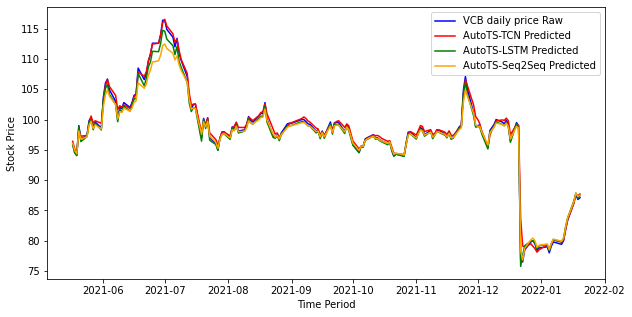

In [64]:
# plot the result
import matplotlib.pyplot as plt

lookback = auto_estimator.get_best_config()['past_seq_len']
groundtruth_unscale = tsdata_test.unscale().to_pandas()[lookback - 1:]

plt.figure(figsize=(10,5))
plt.plot(groundtruth_unscale["date"], groundtruth_unscale["close"], color='blue', label="VCB daily price Raw")
plt.plot(groundtruth_unscale["date"], y_pred_tcn[:,0,0], color='red', label="AutoTS-TCN Predicted")
plt.plot(groundtruth_unscale["date"], y_pred_lstm[:,0,0], color='green', label="AutoTS-LSTM Predicted")
plt.plot(groundtruth_unscale["date"], y_pred_seq2seq[:,0,0], color='orange', label="AutoTS-Seq2Seq Predicted")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()